# Drone Detection Using YOLOv8: A Comprehensive Dataset and Model Approach

<br>

<img src="https://images.pexels.com/photos/1852984/pexels-photo-1852984.jpeg" height=550 width=1000 alt="https://www.pexels.com/"/>

<small>Picture Source: <a href="https://www.pexels.com/tr-tr/@sulimansallehi/">Suliman Sallehi</a></small>

<br>

## Abstract
Unmanned aerial vehicles (UAVs), commonly known as drones, have become increasingly prevalent in various domains, including surveillance, photography, and delivery services. However, the rapid proliferation of drones raises concerns regarding security and privacy threats. To address these concerns, effective drone detection systems are crucial for identifying and tracking drones in real-time. In this research, we present a comprehensive dataset and propose a state-of-the-art drone detection model using the YOLOv8 architecture.

## Introduction
The widespread adoption of drones has led to an urgent need for reliable drone detection systems to ensure the safety and security of public spaces. Drone detection poses unique challenges due to the small size, fast movement, and diverse appearance of drones, making traditional object detection methods insufficient. Therefore, there is a growing demand for advanced detection models that can accurately identify drones in complex environments.
YOLO (You Only Look Once) is an object detection algorithm that was introduced in 2015 by **Joseph Redmon** et al. It revolutionized the field of computer vision by providing a real-time object detection solution with impressive accuracy.


## Dataset
To facilitate the development and evaluation of drone detection models, we introduce a novel and comprehensive dataset specifically curated for training and testing drone detection algorithms. The dataset, sourced from the publicly available [YOLO Drone Detection Dataset](https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset) on Kaggle, comprises a diverse set of annotated images captured in various environmental conditions and camera perspectives. The dataset includes instances of drones along with other common objects to enable robust detection and classification.

## Methodology
In this study, we employ the YOLOv8 architecture, a popular and highly efficient object detection framework, for drone detection. YOLOv8 stands for "You Only Look Once" version 7, which utilizes a single neural network to simultaneously predict bounding boxes and class probabilities for multiple objects in an image. This architecture offers real-time performance, making it ideal for drone detection applications.

## Experimental Setup
To train and evaluate our drone detection model, we utilize the Colab platform, a cloud-based environment that provides access to powerful computing resources and deep learning libraries. Leveraging Colab's GPU acceleration capabilities, we train the YOLOv8 model using our curated dataset and fine-tune its parameters to optimize detection accuracy and efficiency.

## YOLO


*   **Single Pass Detection**: YOLO takes a different approach compared to traditional object detection methods that use region proposal techniques. Instead of dividing the image into regions and examining each region separately, YOLO performs detection in a single pass. It divides the input image into a grid and predicts bounding boxes and class probabilities for each grid cell.


*   **Grid-based Prediction**: YOLO divides the input image into a fixed-size grid, typically, say, 7x7 or 13x13. Each grid cell is responsible for predicting objects that fall within it. For each grid cell, YOLO predicts multiple bounding boxes (each associated with a confidence score) and class probabilities.

*   **Anchor Boxes**: To handle objects of different sizes and aspect ratios, YOLO uses anchor boxes. These anchor boxes are pre-defined boxes of different shapes and sizes. Each anchor box is associated with a specific grid cell. The network predicts offsets and dimensions for anchor boxes relative to the grid cell, along with the confidence scores and class probabilities.

*   **Training**: YOLO is trained using a combination of labeled bounding box annotations and classification labels. The training process involves optimizing the network to minimize the localization loss (related to the accuracy of bounding box predictions) and the classification loss (related to the accuracy of class predictions).

*   **Speed and Accuracy Trade-off**: YOLO achieves real-time object detection by sacrificing some localization accuracy compared to slower methods like Faster R-CNN. However, it still achieves competitive accuracy while providing significantly faster inference speeds, making it well-suited for real-time applications.

<br>

Since its introduction, YOLO has undergone several improvements and variations. Different versions such as YOLOv2, YOLOv3, and YOLOv4 have been developed, each introducing enhancements in terms of accuracy, speed, and additional features.

It's important to note that this is a high-level overview of YOLO, and the algorithm has many technical details and variations. For a more in-depth understanding, it's recommended to refer to the original YOLO papers and related resources.


## Keywords

*   Drone detection
*   YOLOv8
*   Object detection
*   Deep learning
*   Surveillance
*   Security

<br>

Make sure your runtime is **GPU** (_not_ CPU or TPU). And if it is an option, make sure you are using _Python 3_. You can select these settings by going to `Runtime -> Change runtime type -> Select the above mentioned settings and then press SAVE`.


## Importing Libraries

In [2]:
!pip install ultralytics -q

In [1]:
import os
from pathlib import Path
import pandas as pd

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image

# from google.colab import files
# from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

In [3]:
from ultralytics import YOLO, checks
import torch
checks()


Ultralytics YOLOv8.2.1  Python-3.11.5 torch-2.2.2+cpu CPU (12th Gen Intel Core(TM) i7-1255U)
Setup complete  (12 CPUs, 15.7 GB RAM, 183.6/487.1 GB disk)


## Data Preprocessing

In [21]:
%cd /content/

[WinError 2] The system cannot find the file specified: '/content/'

c:\Users\HP\.vscode\drone_detection\Drone-Detection-YOLOv8x


In [22]:
files.upload()

NameError: name 'files' is not defined

In [ ]:
!unzip -q /content/archive.zip

In [ ]:
# !rm -rf /content/archive.zip

In [5]:
#@markdown ---
#@markdown ### Enter image paths:
train_images_dir = r"/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images" #@param {type:"string"}
val_images_dir = r"/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/images" #@param {type:"string"}

train_image_count = len([f for f in os.listdir(train_images_dir) if f.endswith(".jpg")])
val_image_count = len([f for f in os.listdir(val_images_dir) if f.endswith(".jpg")])

print(f"Number of images in train folder: {train_image_count}")
print(f"Number of images in val folder: {val_image_count}")
#@markdown ---

Number of images in train folder: 1012
Number of images in val folder: 347


In [6]:
#@markdown ---
#@markdown ### Enter label paths:
train_labels_dir = r"/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/labels" #@param {type:"string"}
val_labels_dir = r"/kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/labels" #@param {type:"string"}

train_txt_count = len([f for f in os.listdir(train_labels_dir) if f.endswith(".txt")])
val_txt_count = len([f for f in os.listdir(val_labels_dir) if f.endswith(".txt")])

print(f"Number of TXT files in train labels folder: {train_txt_count}")
print(f"Number of TXT files in val labels folder: {val_txt_count}")
#@markdown ---

Number of TXT files in train labels folder: 1012
Number of TXT files in val labels folder: 348


## Training

YOLOv8 GitHub: [ultralytics](https://github.com/ultralytics/ultralytics)

In [7]:
torch.__version__

'2.1.2'

In [9]:
!ls -l


total 0


Before training, you neet change `coco.yaml` and define your number of class, class names and train-val paths like that:

```
train: ../drone_dataset/train
val: ../drone_dataset/valid

# number of classes
nc: 1

# class names
names: ['drone']
```

In [10]:
yaml_content = '''
train: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train
val: /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid

# number of classes
nc: 1

# class names
names: ['drone']
'''

with open('coco.yaml', 'w') as f:
    f.write(yaml_content)


*   `!yolo train`: This is the command to execute the yolo script for training the YOLOv8 model.

*  `data=/content/coco.yaml`: This parameter specifies the path to the YAML file containing the dataset configuration. In this case, **the *coco.yaml* file is used, which provides information about the dataset, including the classes and paths to the training and validation data.**

*  `imgsz=640`: This parameter sets the input image size for the model. The YOLOv8 model requires square input images, and here the dimensions are set to 640x640 pixels.

*  `epochs=32`: This parameter defines the number of epochs, which represents the number of times the entire training dataset will be passed through the model during training. In this case, the model will be trained for **32 epochs**.

*  `model = YOLO("yolov8x.pt")`: This parameter specifies the initial weights of the model. The *yolov8x.pt* file contains the pre-trained weights for the *YOLOv8* model, which will be used as the starting point for training.

In [26]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''


In [11]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 308MB/s] 


In [12]:
results = model.train(
        batch=16,
        data=r"coco.yaml",
        epochs=32,
        imgsz=640,
    )

Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=coco.yaml, epochs=32, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 755k/755k [00:00<00:00, 38.2MB/s]
2024-04-19 09:40:06,734	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-19 09:40:07,502	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-19 09:40:09.889617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 09:40:09.889711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 09:40:10.024817: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 159MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/labels... 1011 images, 0 backgrounds, 1 corrupt: 100%|██████████| 1012/1012 [00:03<00:00, 324.68it/s]

train: WARNING ⚠️ /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images/pic_722.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images/pic_722.jpg'
train: WARNING ⚠️ Cache directory /kaggle/input/yolo-drone-detection-dataset/drone_dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid/labels... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:01<00:00, 288.47it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-drone-detection-dataset/drone_dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 32 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/32      14.3G      1.574      2.209       1.82         46        640:  69%|██████▉   | 44/64 [00:51<00:23,  1.16s/it]libpng warning: iCCP: known incorrect sRGB profile
       1/32      14.3G      1.614      2.151      1.842         49        640:  88%|████████▊ | 56/64 [01:05<00:09,  1.18s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
       1/32      14.3G      1.642      2.157       1.87          4        640: 100%|██████████| 64/64 [01:14<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.29it/s]

                   all        347        369     0.0053      0.282    0.00247   0.000782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/32        14G      1.881       2.08      2.018         54        640:  47%|████▋     | 30/64 [00:36<00:42,  1.24s/it]libpng warning: iCCP: known incorrect sRGB profile
       2/32        14G      1.877      2.074      2.017         47        640:  50%|█████     | 32/64 [00:39<00:39,  1.24s/it]libpng warning: iCCP: known incorrect sRGB profile
       2/32        14G      1.885      2.061      2.024         40        640:  72%|███████▏  | 46/64 [00:56<00:21,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       2/32        14G       1.88      2.041      2.018         45        640:  95%|█████████▌| 61/64 [01:14<00:03,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       2/32        14G      1.888      2.039       2.02          8        640: 100%|██████████| 64/64 [01:16<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.52it/s]

                   all        347        369    0.00141      0.187   0.000721   0.000187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/32        14G      1.884      1.938      2.052         36        640:  16%|█▌        | 10/64 [00:12<01:05,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
       3/32        14G        1.9      2.028      2.043         51        640:  59%|█████▉    | 38/64 [00:46<00:31,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       3/32        14G      1.898      1.984      2.029          5        640: 100%|██████████| 64/64 [01:16<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.48it/s]

                   all        347        369     0.0516      0.136     0.0171    0.00513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
       4/32        14G      1.756      1.814      1.938         40        640:  16%|█▌        | 10/64 [00:11<01:04,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       4/32        14G      1.783      1.802      1.915         40        640:  84%|████████▍ | 54/64 [01:05<00:11,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       4/32        14G       1.78      1.805      1.913         10        640: 100%|██████████| 64/64 [01:16<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.46it/s]

                   all        347        369      0.136      0.309     0.0925     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/32        14G      1.583       1.54      1.725         44        640:   3%|▎         | 2/64 [00:02<01:13,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       5/32        14G      1.705      1.684      1.831         49        640:  72%|███████▏  | 46/64 [00:55<00:21,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       5/32        14G      1.705      1.691      1.841         48        640:  89%|████████▉ | 57/64 [01:08<00:08,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       5/32        14G      1.707      1.702      1.839          9        640: 100%|██████████| 64/64 [01:15<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.47it/s]

                   all        347        369     0.0022      0.436    0.00193   0.000693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/32        14G      1.654      1.621        1.8         33        640:  41%|████      | 26/64 [00:31<00:45,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       6/32        14G      1.656       1.62      1.801         41        640:  42%|████▏     | 27/64 [00:32<00:44,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
       6/32        14G       1.67      1.664        1.8          8        640: 100%|██████████| 64/64 [01:15<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.628      0.523      0.553      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/32        14G      1.675      1.599      1.776         41        640:  30%|██▉       | 19/64 [00:22<00:54,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
       7/32        14G      1.633      1.578      1.758         39        640:  61%|██████    | 39/64 [00:46<00:30,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
       7/32        14G      1.633      1.572      1.769         51        640:  77%|███████▋  | 49/64 [00:58<00:17,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       7/32        14G      1.633      1.566      1.769          9        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.616      0.409      0.468      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/32        14G      1.543      1.523      1.717         47        640:  12%|█▎        | 8/64 [00:09<01:06,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       8/32        14G       1.53      1.504        1.7         49        640:  38%|███▊      | 24/64 [00:28<00:48,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
       8/32        14G      1.539      1.503      1.692         46        640:  56%|█████▋    | 36/64 [00:43<00:33,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       8/32        14G      1.555      1.473      1.702         47        640:  95%|█████████▌| 61/64 [01:13<00:03,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
       8/32        14G      1.549      1.458      1.699         10        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.632      0.477      0.516      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/32        14G      1.503      1.373      1.667         52        640:  23%|██▎       | 15/64 [00:17<00:58,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       9/32        14G      1.505      1.376      1.666         51        640:  25%|██▌       | 16/64 [00:19<00:57,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
       9/32        14G       1.52      1.423      1.688          9        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.624      0.621      0.597      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/32        14G       1.56       1.42      1.679         36        640:  25%|██▌       | 16/64 [00:19<00:57,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      10/32        14G      1.543      1.406      1.671         44        640:  30%|██▉       | 19/64 [00:22<00:54,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      10/32        14G       1.54      1.404      1.671         39        640:  31%|███▏      | 20/64 [00:23<00:52,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      10/32        14G      1.545      1.363      1.677         10        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.738      0.577      0.635       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/32        14G      1.533      1.396      1.673         48        640:  23%|██▎       | 15/64 [00:17<00:58,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      11/32        14G      1.527      1.392      1.663         57        640:  25%|██▌       | 16/64 [00:19<00:57,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      11/32        14G       1.51      1.397      1.656         43        640:  89%|████████▉ | 57/64 [01:08<00:08,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      11/32        14G      1.502      1.386      1.647         10        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.645      0.539      0.594      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/32        14G        1.5      1.359      1.641         46        640:  19%|█▉        | 12/64 [00:14<01:01,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      12/32        14G      1.459      1.288      1.632         40        640:  39%|███▉      | 25/64 [00:29<00:46,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      12/32        14G      1.449      1.301      1.624         30        640:  89%|████████▉ | 57/64 [01:08<00:08,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      12/32        14G      1.456      1.297      1.623         13        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.697      0.637      0.653      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/32        14G      1.455      1.371      1.638         51        640:   8%|▊         | 5/64 [00:05<01:10,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      13/32        14G      1.472       1.36      1.645         41        640:  14%|█▍        | 9/64 [00:10<01:05,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      13/32        14G      1.489      1.367      1.636         43        640:  25%|██▌       | 16/64 [00:19<00:57,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      13/32        14G      1.441      1.296        1.6         50        640:  98%|█████████▊| 63/64 [01:15<00:01,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      13/32        14G       1.44      1.292      1.604          7        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.864      0.634      0.748      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/32        14G      1.416      1.191      1.583         47        640:  11%|█         | 7/64 [00:08<01:08,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      14/32        14G      1.393      1.197      1.557         36        640:  81%|████████▏ | 52/64 [01:02<00:14,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      14/32        14G        1.4      1.206       1.57          7        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.785      0.556      0.616      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/32        14G      1.395      1.212      1.567         50        640:  41%|████      | 26/64 [00:31<00:45,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      15/32        14G      1.405      1.224      1.571         59        640:  42%|████▏     | 27/64 [00:32<00:44,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
      15/32        14G      1.393      1.226      1.566         40        640:  62%|██████▎   | 40/64 [00:48<00:28,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      15/32        14G       1.37      1.211       1.55          8        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.831      0.634      0.728      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/32        14G       1.35      1.175      1.521         38        640:  17%|█▋        | 11/64 [00:13<01:03,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      16/32        14G      1.339      1.158      1.521         48        640:  55%|█████▍    | 35/64 [00:41<00:35,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
      16/32        14G      1.335      1.164      1.519         50        640:  95%|█████████▌| 61/64 [01:12<00:03,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      16/32        14G      1.336      1.164       1.52         53        640:  97%|█████████▋| 62/64 [01:14<00:02,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      16/32        14G      1.338       1.18      1.521          5        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [

                   all        347        369       0.86      0.675      0.793      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/32        14G      1.369       1.15      1.536         41        640:  91%|█████████ | 58/64 [01:09<00:07,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      17/32        14G      1.364      1.147      1.537          9        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.846       0.68      0.748      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/32        14G      1.398       1.14       1.53         50        640:  19%|█▉        | 12/64 [00:14<01:01,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      18/32        14G      1.369      1.112      1.528         41        640:  61%|██████    | 39/64 [00:46<00:30,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
      18/32        14G      1.353      1.106      1.524         46        640:  83%|████████▎ | 53/64 [01:03<00:13,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      18/32        14G       1.35      1.101      1.521          7        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.755      0.743      0.805       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/32        14G      1.299      1.017      1.471         52        640:   9%|▉         | 6/64 [00:07<01:08,  1.18s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
      19/32        14G      1.316      1.073      1.485         51        640:  72%|███████▏  | 46/64 [00:55<00:21,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      19/32        14G      1.303      1.066      1.478          7        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.871      0.602      0.696        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/32        14G      1.263      1.053      1.458         30        640:  16%|█▌        | 10/64 [00:11<01:03,  1.18s/it]libpng warning: iCCP: known incorrect sRGB profile
      20/32        14G      1.278      1.054      1.479         45        640:  44%|████▍     | 28/64 [00:33<00:43,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      20/32        14G       1.28      1.047      1.488         40        640:  62%|██████▎   | 40/64 [00:47<00:28,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      20/32        14G      1.292      1.057      1.496          8        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.821       0.67      0.781      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/64 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
      21/32        14G      1.344      1.057      1.527         38        640:  19%|█▉        | 12/64 [00:14<01:02,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      21/32        14G      1.298      1.039      1.487         56        640:  84%|████████▍ | 54/64 [01:04<00:11,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      21/32        14G      1.291      1.051      1.488          5        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
libpng warning: iCCP: known incorrect sRGB profile
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.785      0.618      0.709      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/32        14G       1.02     0.8643      1.322         39        640:   2%|▏         | 1/64 [00:01<01:15,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
      22/32        14G      1.271       1.01      1.477         49        640:  20%|██        | 13/64 [00:15<01:00,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      22/32        14G      1.257      1.017      1.468          6        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.828      0.768      0.831      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/32        14G      1.187     0.9244      1.535         16        640:  23%|██▎       | 15/64 [00:18<00:58,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      23/32        14G      1.184     0.8781      1.521         16        640:  41%|████      | 26/64 [00:31<00:45,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      23/32        14G      1.199     0.8846      1.538         16        640:  89%|████████▉ | 57/64 [01:08<00:08,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      23/32        14G      1.191     0.8812      1.525          3        640: 100%|██████████| 64/64 [01:16<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.52it/s]

                   all        347        369      0.855      0.713      0.804      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/32        14G       1.07     0.7561      1.466         17        640:   2%|▏         | 1/64 [00:01<01:16,  1.22s/it]libpng warning: iCCP: known incorrect sRGB profile
      24/32        14G      1.111     0.8542      1.452         20        640:   8%|▊         | 5/64 [00:05<01:09,  1.18s/it]libpng warning: iCCP: known incorrect sRGB profile
      24/32        14G       1.14     0.8316      1.501         16        640:  31%|███▏      | 20/64 [00:23<00:52,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      24/32        14G      1.149     0.8016      1.483         22        640:  95%|█████████▌| 61/64 [01:12<00:03,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      24/32        14G      1.149      0.803       1.49          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.836      0.744      0.809      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/32        14G      1.138     0.7867      1.477         16        640:  75%|███████▌  | 48/64 [00:57<00:19,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
      25/32        14G      1.155      0.779      1.486          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.812       0.75      0.808      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/32        14G      1.165     0.7505      1.511         17        640:  27%|██▋       | 17/64 [00:20<00:56,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      26/32        14G      1.089     0.7098      1.447         17        640:  81%|████████▏ | 52/64 [01:02<00:14,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      26/32        14G      1.091       0.71      1.446         16        640:  86%|████████▌ | 55/64 [01:05<00:10,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      26/32        14G      1.095     0.7149      1.443          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.843      0.748      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/32        14G      1.073      0.682      1.424         17        640:  64%|██████▍   | 41/64 [00:49<00:27,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      27/32        14G      1.078     0.6903      1.423         16        640:  70%|███████   | 45/64 [00:53<00:22,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      27/32        14G       1.08     0.6899      1.419         18        640:  77%|███████▋  | 49/64 [00:58<00:17,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      27/32        14G      1.086     0.6881      1.425          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.50it/s]

                   all        347        369      0.873      0.759       0.85      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/32        14G      1.057     0.6699       1.41         17        640:  44%|████▍     | 28/64 [00:33<00:43,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      28/32        14G      1.054     0.6803      1.407         17        640:  55%|█████▍    | 35/64 [00:41<00:35,  1.21s/it]libpng warning: iCCP: known incorrect sRGB profile
      28/32        14G      1.054     0.6784      1.407         19        640:  56%|█████▋    | 36/64 [00:43<00:33,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      28/32        14G      1.052     0.6829      1.403          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.854      0.778      0.847      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/32        14G      1.016     0.6366       1.37         18        640:  47%|████▋     | 30/64 [00:35<00:40,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      29/32        14G      1.002     0.6255      1.369         17        640:  88%|████████▊ | 56/64 [01:06<00:09,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      29/32        14G     0.9991     0.6254      1.368         21        640:  91%|█████████ | 58/64 [01:09<00:07,  1.18s/it]libpng warning: iCCP: known incorrect sRGB profile
      29/32        14G      1.025      0.633      1.382          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        347        369      0.884      0.786      0.868      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/32        14G     0.9634     0.5983      1.278         17        640:  12%|█▎        | 8/64 [00:09<01:06,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      30/32        14G     0.9756     0.6023      1.313         16        640:  30%|██▉       | 19/64 [00:22<00:54,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      30/32        14G      1.014     0.6402      1.365         19        640:  72%|███████▏  | 46/64 [00:55<00:21,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      30/32        14G      1.006     0.6305      1.361         17        640:  98%|█████████▊| 63/64 [01:15<00:01,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      30/32        14G      1.006     0.6291      1.364          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.52it/s]

                   all        347        369      0.897      0.803      0.879      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/32        14G      1.011     0.5792      1.356         18        640:  14%|█▍        | 9/64 [00:10<01:05,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      31/32        14G      0.985     0.5989      1.335         17        640:  75%|███████▌  | 48/64 [00:57<00:19,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      31/32        14G     0.9864     0.6013      1.343          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.891       0.77      0.854      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/32        14G     0.6752     0.4854       1.22         18        640:   2%|▏         | 1/64 [00:01<01:15,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      32/32        14G      1.044     0.6293      1.435         20        640:   8%|▊         | 5/64 [00:05<01:09,  1.19s/it]libpng warning: iCCP: known incorrect sRGB profile
      32/32        14G     0.9748     0.6066      1.336         20        640:  62%|██████▎   | 40/64 [00:47<00:28,  1.20s/it]libpng warning: iCCP: known incorrect sRGB profile
      32/32        14G     0.9595     0.5873      1.324          3        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.51it/s]

                   all        347        369      0.901      0.764      0.854      0.514



32 epochs completed in 0.763 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:08<00:00,  1.36it/s]


                   all        347        369      0.904      0.767      0.854      0.514
Speed: 0.2ms preprocess, 17.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


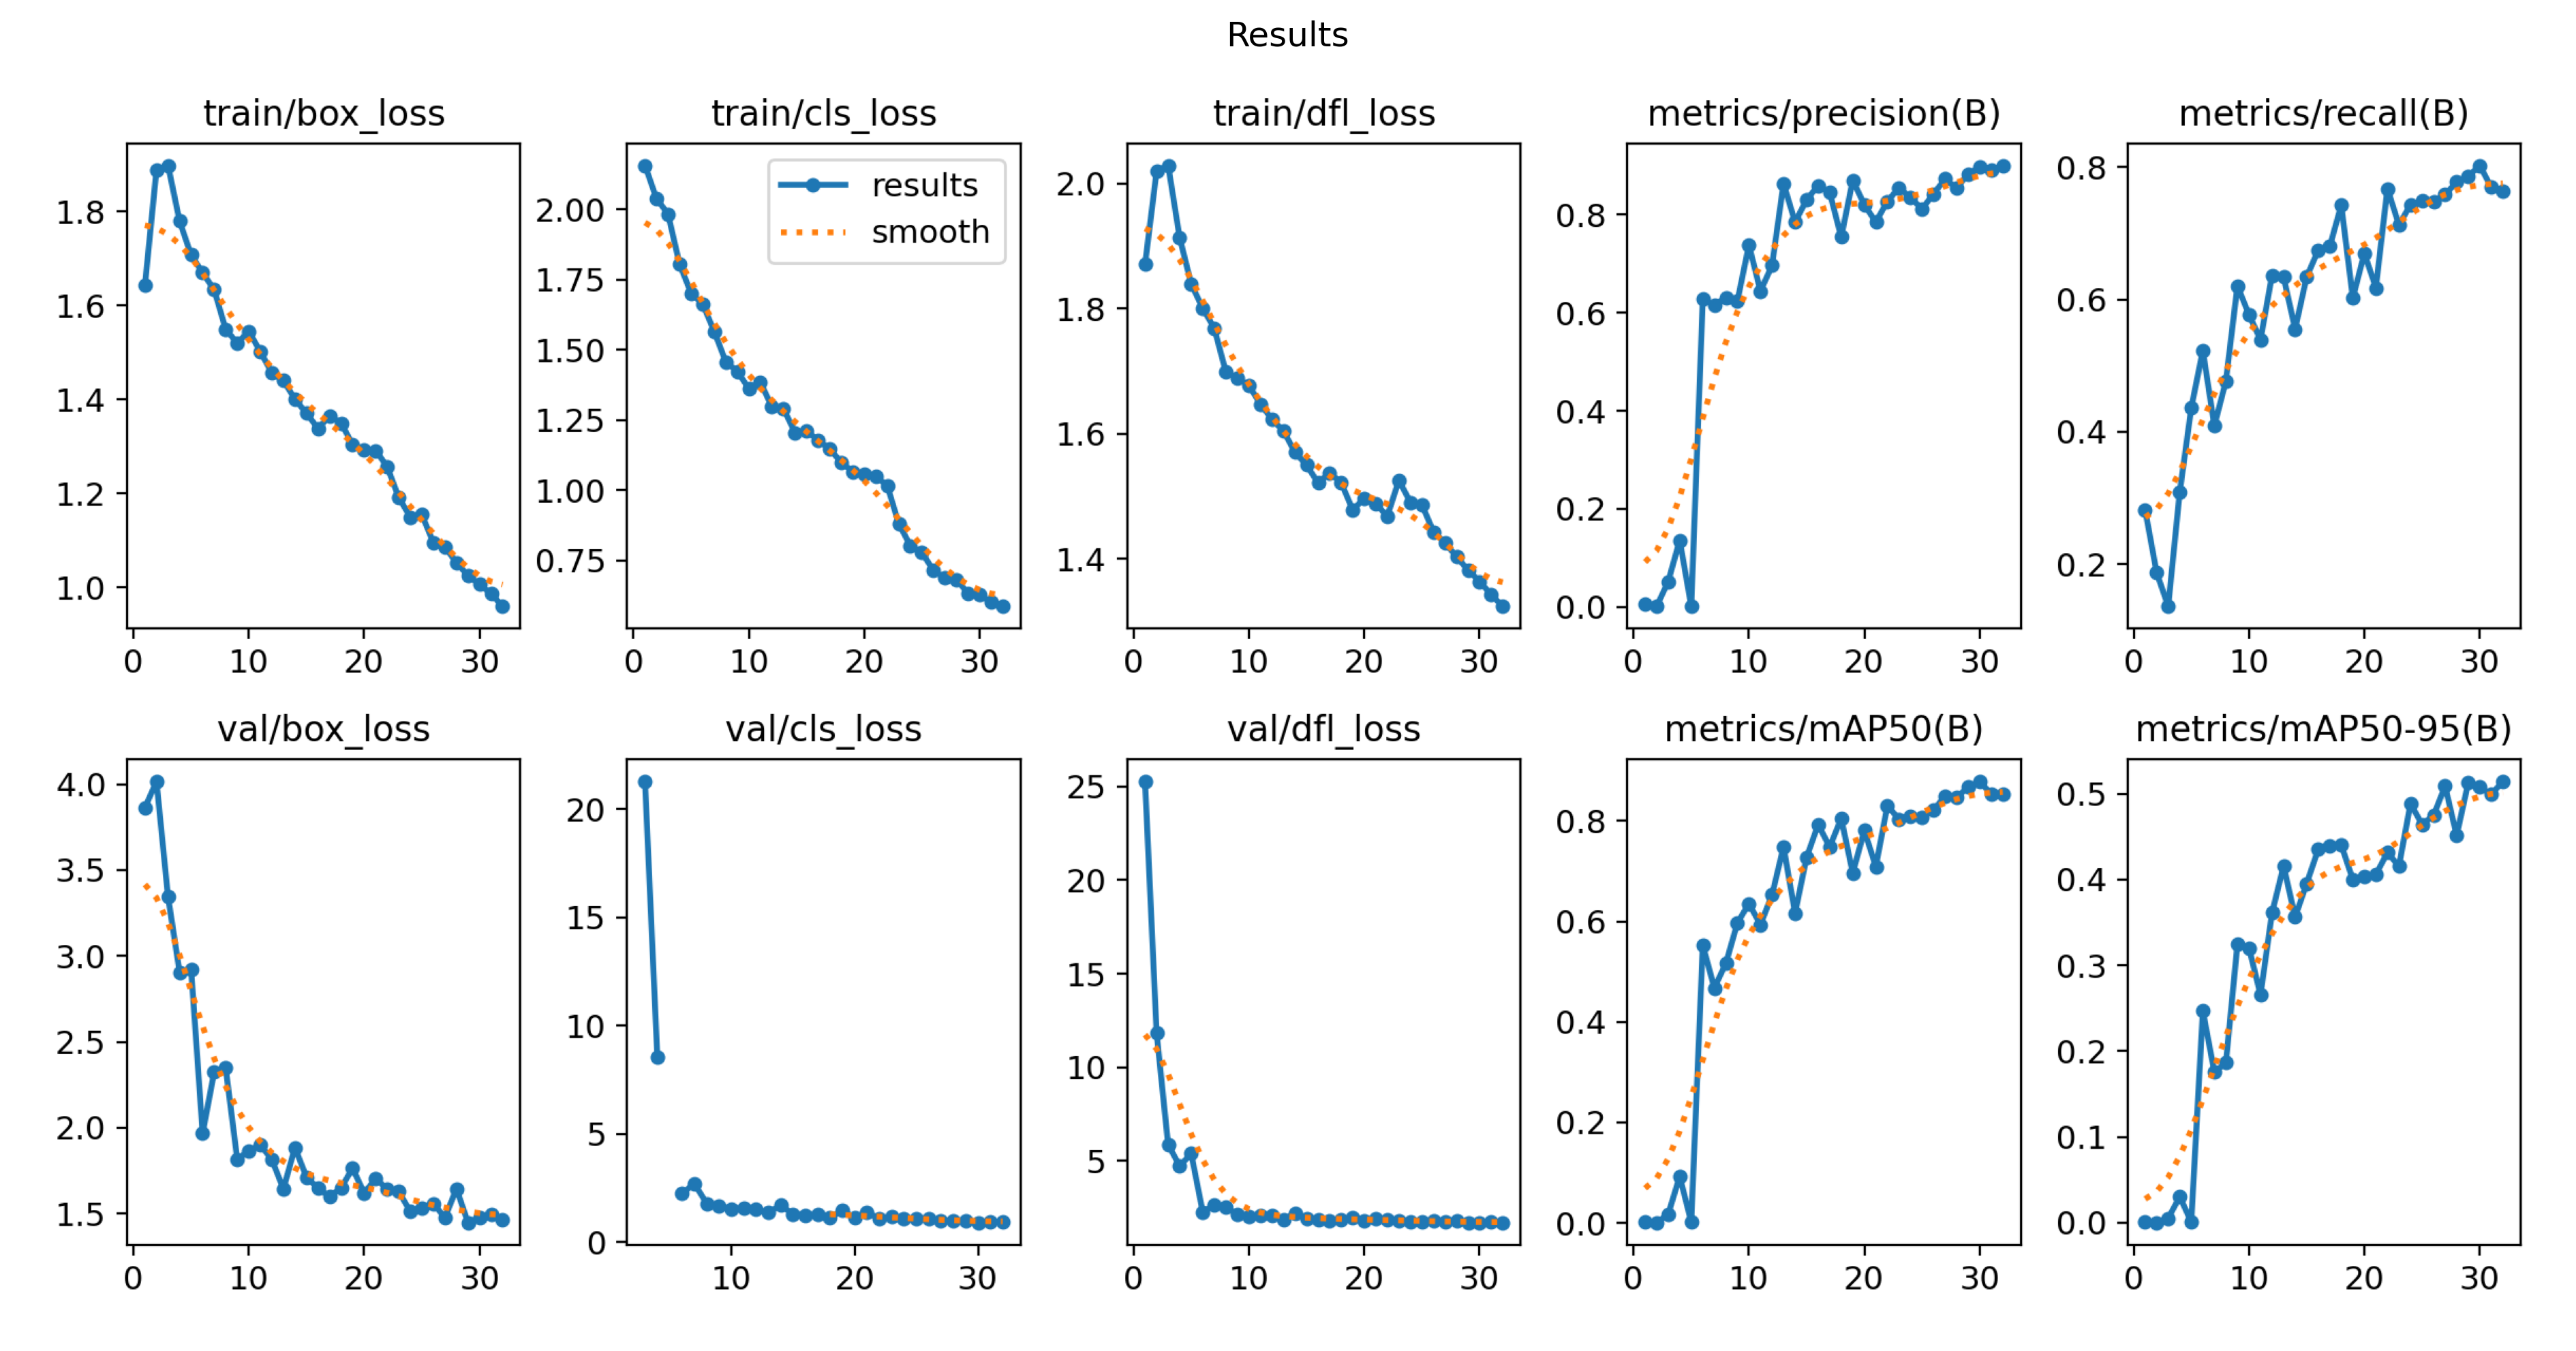

In [13]:
image = mpimg.imread('/kaggle/working/runs/detect/train/results.png')
plt.figure(figsize=(16, 9), dpi=300)
plt.title('Results')
plt.imshow(image)
plt.axis('off')
plt.show()

To calculate *mAP @ 0.5*, the model's predicted bounding boxes are compared to the ground truth bounding boxes for various objects in the dataset. The average precision (AP) is computed for each class at an IoU threshold of 0.5, and then the mean of these average precision scores is calculated across all classes. *mAP @ 0.5* provides an overall measure of the model's detection performance, indicating how well it can identify objects with a reasonable overlap threshold.

## Tracking Drone with YOLOv8

Object tracking is a task that involves identifying the location and class of objects, then assigning a unique ID to that detection in video streams.

Video source: [@ninosouza](https://www.pexels.com/@ninosouza/)

Video link: [pexels](https://www.pexels.com/video/an-airborne-drone-machine-8459631/)

In [ ]:
model = YOLO(r"C:\Users\HP\.vscode\drone_detection\drone_detection_system\best.pt")
result = model.track(source=r"C:\Users\HP\.vscode\drone_detection\drone_detection_system\test\pexels-joseph-redfield-8459631 (1080p).mp4", conf=0.3, iou=0.5, show=True)

## Save the Weights and Configuration File

In [ ]:
# model.export(format='onnx')

In [15]:
files.download('/content/coco.yaml')
files.download('/content/runs/detect/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
!rm -rf /content/runs/detect/train2/weights

In [17]:
!zip -r '/content/results.zip' '/content/runs/detect/train2/'

  adding: content/runs/detect/train2/ (stored 0%)

  adding: content/runs/detect/train2/R_curve.png (deflated 17%)

  adding: content/runs/detect/train2/P_curve.png (deflated 18%)

  adding: content/runs/detect/train2/confusion_matrix.png (deflated 38%)

  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 13%)

  adding: content/runs/detect/train2/train_batch1409.jpg (deflated 21%)

  adding: content/runs/detect/train2/train_batch2.jpg (deflated 15%)

  adding: content/runs/detect/train2/train_batch1410.jpg (deflated 20%)

  adding: content/runs/detect/train2/train_batch1.jpg (deflated 10%)

  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 12%)

  adding: content/runs/detect/train2/events.out.tfevents.1690192204.26ceb98ea218.236.1 (deflated 72%)

  adding: content/runs/detect/train2/PR_curve.png (deflated 21%)

  adding: content/runs/detect/train2/args.yaml (deflated 51%)

  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 15%)

  ad

In [18]:
files.download('/content/results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Results and Discussion

We present comprehensive results of our drone detection model's performance on both the training and testing datasets. The evaluation metrics include precision, recall, and F1-score, which are standard measures to assess the model's detection accuracy. Additionally, we analyze the model's performance across various environmental conditions and discuss its strengths and limitations.

## Conclusion
Our research addresses the critical need for reliable drone detection systems by proposing a comprehensive dataset and a state-of-the-art detection model using the YOLOv8 architecture. The availability of our curated dataset and the promising performance of our model offer valuable contributions to the field of drone detection. The outcomes of this study can pave the way for enhanced security measures and privacy protection in areas where drones pose potential risks.

## Contact Us
<p>If you have something to say please contact us:</p>

<ul>
  <li>Mail address: maneebajmal@gmail.com</li>
  <li>Mail address: ahmadkhanfareed388@gmail.com</li>
</ul>

In [13]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-07-24 11:13:17
